# ЛАБОРАТОРНАЯ РАБОТА №1
### Разведочный и регрессионный анализ данных на основе нейросетевых моделей
Вариант 6

In [43]:
# Load libraries.
import pandas as pd
import numpy as np

from pandas import set_option

set_option('display.precision', 3) # Устанавливаем точность отображения чисел до 3 знаков после запятой.


### Загрузка csv файла

In [47]:
# Пункт 2: Загрузка csv файла
df = pd.read_csv("https://raw.githubusercontent.com/v-stv/lab1/main/V5.csv", index_col=0)

# Drop "motor_UPDRS" и "index" (как в задании)
# (Если колонки не найдены — будет KeyError; можно обрабатывать, но оставим прямо как в задании)
df = df.drop(columns=["motor_UPDRS", "index"])
df.shape

(5875, 21)

### Ознакомление с данными.

In [48]:
df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.643,34.398,0.007,3.380e-05,4.010e-03,0.003,0.012,...,0.230,0.014,0.013,0.017,0.043,0.014,21.640,0.419,0.548,0.160
1,1,72,0,12.666,34.894,0.003,1.680e-05,1.320e-03,0.002,0.004,...,0.179,0.010,0.011,0.017,0.030,0.011,27.183,0.435,0.565,0.108
2,1,72,0,19.681,35.389,0.005,NaN,2.050e-03,0.002,0.006,...,0.181,0.007,0.008,0.015,0.022,0.020,23.047,0.462,0.544,0.210
3,1,72,0,25.647,35.810,0.005,NaN,1.910e-03,0.003,0.006,...,0.327,0.011,0.013,0.020,0.033,0.028,24.445,0.487,0.578,0.333
4,1,72,0,33.642,36.375,0.003,2.014e-05,9.300e-04,0.001,0.003,...,0.176,0.007,0.009,0.018,0.020,0.012,26.126,0.472,0.561,0.194


В наборе данных 21 столбец. total_UPDRS - целевой признак, содержащий информацию о болезни Паркинсона у субъекта.

Остальные признаки - медицинские показатели, характеризующие наличие у пациента тремора и других признаков болезни Паркинсона. Кроме того, в наборе присутствуют возраст, пол и продолжительность обследования.

In [49]:
df.info() # Информация о DataFrame: количество записей, типы данных и количество ненулевых значений в каждом столбце.

<class 'pandas.core.frame.DataFrame'>
Index: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    2944 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE         

В наборе данных есть пропуски для столбцов Jitter(Abs) и Jitter(PPQ5). Данные числовые.

In [51]:
df.describe()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000,5875.000,5875.000,5875.000,5875.000,5.875e+03,2.944e+03,5.875e+03,5.875e+03,5.875e+03,...,5875.000,5875.000,5875.000,5875.000,5875.000,5.875e+03,5875.000,5875.000,5875.000,5875.000
mean,21.494,64.805,0.318,92.864,29.019,6.154e-03,4.409e-05,2.987e-03,3.277e-03,8.962e-03,...,0.311,0.017,0.020,0.027,0.051,3.212e-02,21.679,0.541,0.653,0.220
std,12.372,8.822,0.466,53.446,10.700,5.624e-03,3.552e-05,3.124e-03,3.732e-03,9.371e-03,...,0.230,0.013,0.017,0.020,0.040,5.969e-02,4.291,0.101,0.071,0.091
min,1.000,36.000,0.000,-4.263,7.000,8.300e-04,2.250e-06,3.300e-04,4.300e-04,9.800e-04,...,0.026,0.002,0.002,0.002,0.005,2.860e-04,1.659,0.151,0.514,0.022
25%,10.000,58.000,0.000,46.847,21.371,3.580e-03,2.296e-05,1.580e-03,1.820e-03,4.730e-03,...,0.175,0.009,0.011,0.016,0.028,1.095e-02,19.406,0.470,0.596,0.156
50%,22.000,65.000,0.000,91.523,27.576,4.900e-03,3.458e-05,2.250e-03,2.490e-03,6.750e-03,...,0.253,0.014,0.016,0.023,0.041,1.845e-02,21.920,0.542,0.644,0.205
75%,33.000,72.000,1.000,138.445,36.399,6.800e-03,5.323e-05,3.290e-03,3.460e-03,9.870e-03,...,0.365,0.021,0.024,0.033,0.062,3.146e-02,24.444,0.614,0.711,0.264
max,42.000,85.000,1.000,215.490,54.992,9.999e-02,3.957e-04,5.754e-02,6.956e-02,1.726e-01,...,2.107,0.163,0.167,0.275,0.488,7.483e-01,37.875,0.966,0.866,0.732


Здесь видно, что данные в наборе имеют разный масштаб.

<Axes: >

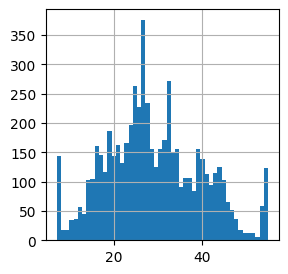

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
df["total_UPDRS"].hist(bins=50, figsize=(3,3)) # Строим гистограмму распределения значений в столбце total_UPDRS, используя 50 интервалов (bins) и устанавливая размер графика 3x3 дюйма.

Распределение целевого признака - нормальное.

<Axes: >

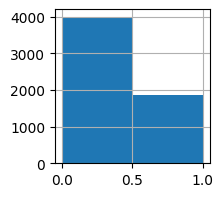

In [57]:
df.sex.hist(bins=2, figsize=(2,2))

Полы распределены неравномерно

<Axes: >

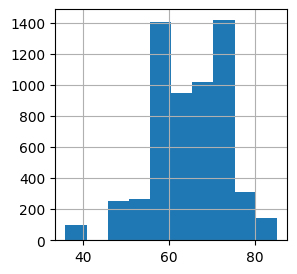

In [60]:
df.age.hist(bins=10, figsize=(3,3))

Распределение возрастов нормальное

array([[<Axes: title={'center': 'Jitter(%)'}>,
        <Axes: title={'center': 'Jitter(Abs)'}>,
        <Axes: title={'center': 'Jitter:RAP'}>,
        <Axes: title={'center': 'Jitter:PPQ5'}>],
       [<Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'Shimmer(dB)'}>,
        <Axes: title={'center': 'Shimmer:APQ3'}>],
       [<Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

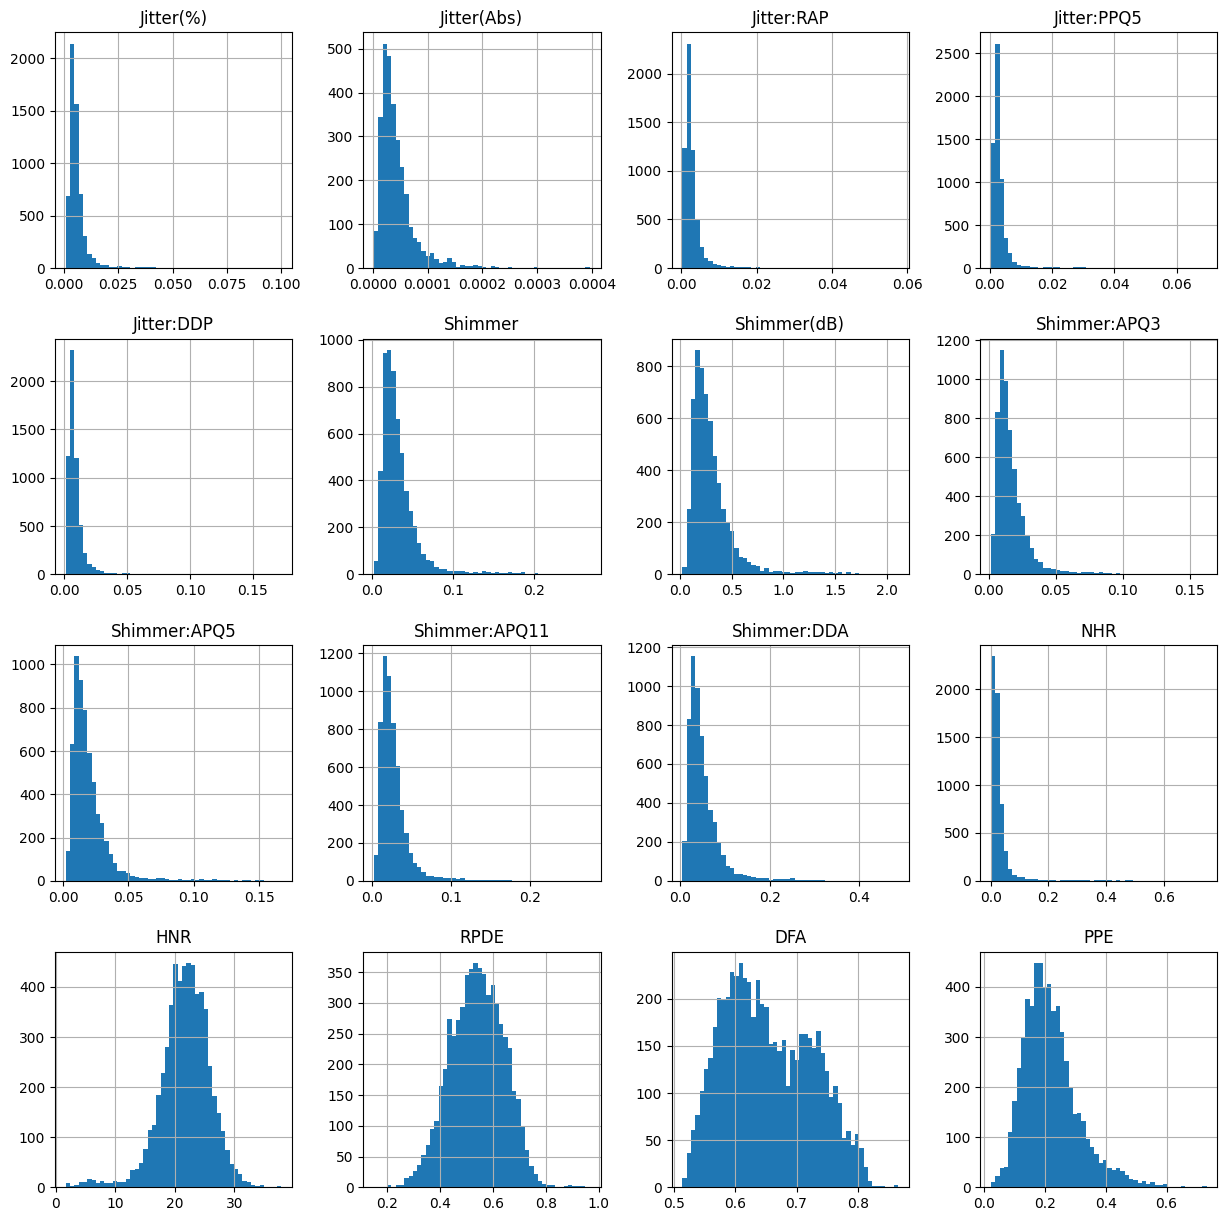

In [61]:
df.iloc[:, 5:21].hist(bins=50, figsize=(15,15))

Большая часть признаков имеет нормальное распределение и тяжелые хвосты справа.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

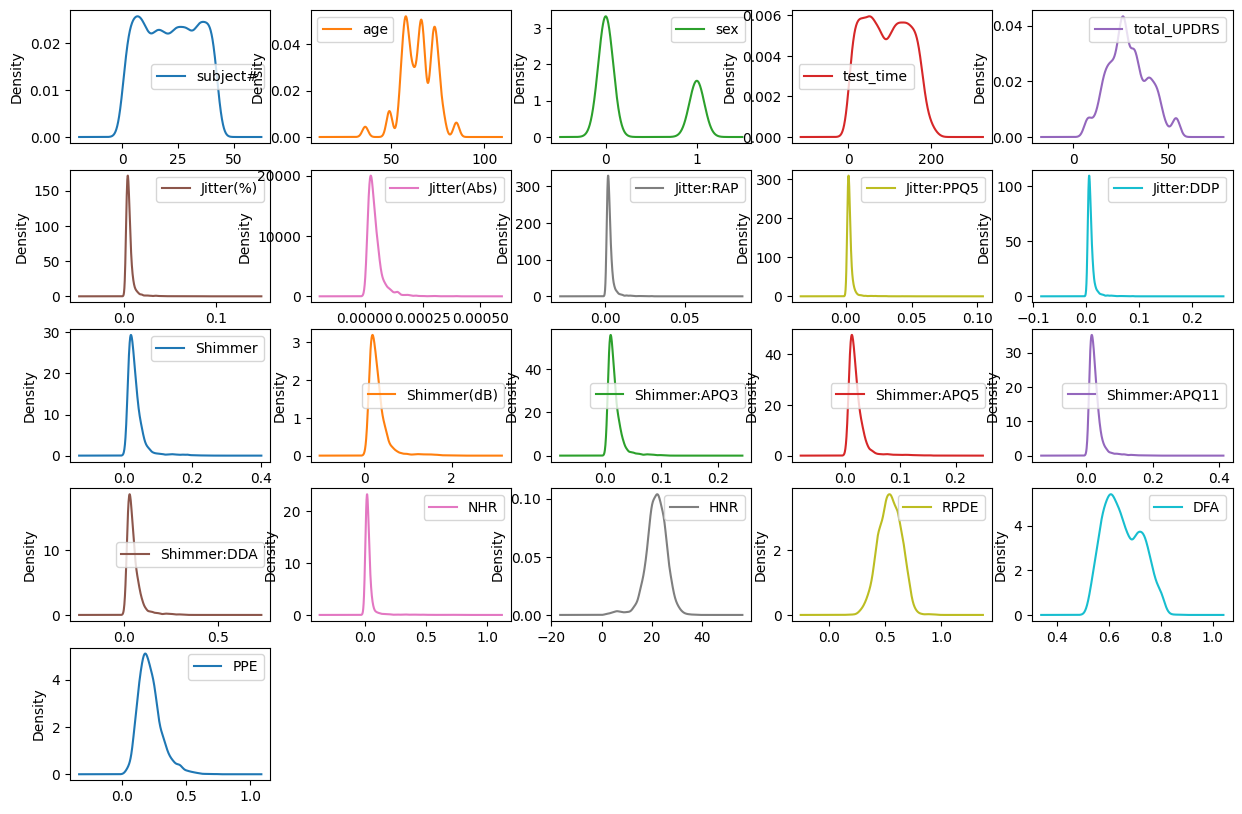

In [62]:
df.plot(kind='density', layout=(5, 5), subplots=True, sharex=False, legend=True, figsize=(15,10))

По диаграммам плотности можно убедиться, что все признаки, кроме возраста, номера субъекта и пола распределены нормально.

array([[<Axes: xlabel='Jitter(%)', ylabel='Jitter(%)'>,
        <Axes: xlabel='Jitter(Abs)', ylabel='Jitter(%)'>,
        <Axes: xlabel='Jitter:RAP', ylabel='Jitter(%)'>,
        <Axes: xlabel='Jitter:PPQ5', ylabel='Jitter(%)'>],
       [<Axes: xlabel='Jitter(%)', ylabel='Jitter(Abs)'>,
        <Axes: xlabel='Jitter(Abs)', ylabel='Jitter(Abs)'>,
        <Axes: xlabel='Jitter:RAP', ylabel='Jitter(Abs)'>,
        <Axes: xlabel='Jitter:PPQ5', ylabel='Jitter(Abs)'>],
       [<Axes: xlabel='Jitter(%)', ylabel='Jitter:RAP'>,
        <Axes: xlabel='Jitter(Abs)', ylabel='Jitter:RAP'>,
        <Axes: xlabel='Jitter:RAP', ylabel='Jitter:RAP'>,
        <Axes: xlabel='Jitter:PPQ5', ylabel='Jitter:RAP'>],
       [<Axes: xlabel='Jitter(%)', ylabel='Jitter:PPQ5'>,
        <Axes: xlabel='Jitter(Abs)', ylabel='Jitter:PPQ5'>,
        <Axes: xlabel='Jitter:RAP', ylabel='Jitter:PPQ5'>,
        <Axes: xlabel='Jitter:PPQ5', ylabel='Jitter:PPQ5'>]], dtype=object)

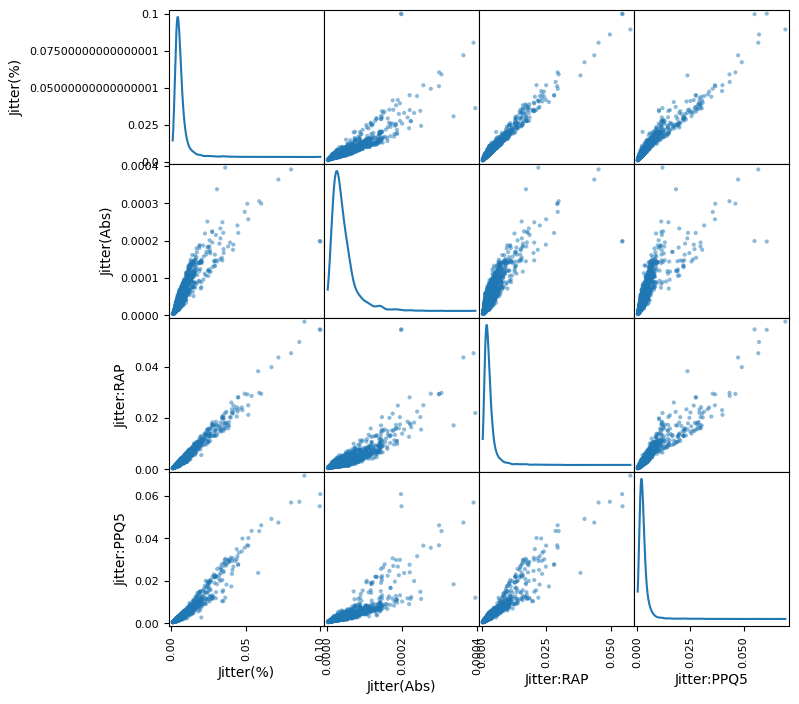

In [63]:
pd.plotting.scatter_matrix(df.iloc[:, 5:9], figsize=(8, 8), diagonal='kde')

Из матриц рассевивания можно увидеть, что признаки типа Jitter коррелируют

array([[<Axes: xlabel='Shimmer', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer(dB)'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer:APQ3'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer:APQ5'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer:AP

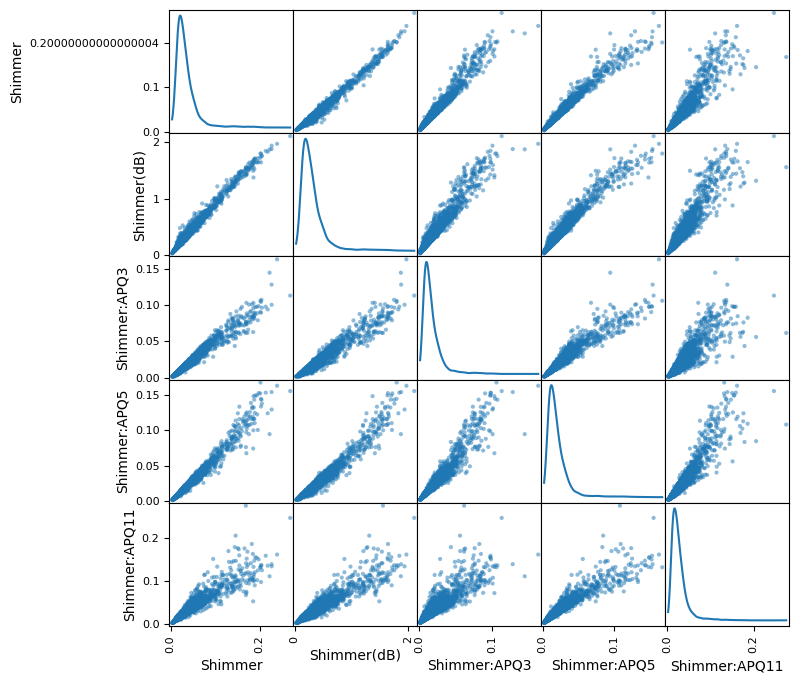

In [64]:
pd.plotting.scatter_matrix(df.iloc[:, 10:15], figsize=(8, 8), diagonal='kde')

То же самое для Shimmer.

array([[<Axes: xlabel='NHR', ylabel='NHR'>,
        <Axes: xlabel='HNR', ylabel='NHR'>,
        <Axes: xlabel='RPDE', ylabel='NHR'>,
        <Axes: xlabel='DFA', ylabel='NHR'>,
        <Axes: xlabel='PPE', ylabel='NHR'>],
       [<Axes: xlabel='NHR', ylabel='HNR'>,
        <Axes: xlabel='HNR', ylabel='HNR'>,
        <Axes: xlabel='RPDE', ylabel='HNR'>,
        <Axes: xlabel='DFA', ylabel='HNR'>,
        <Axes: xlabel='PPE', ylabel='HNR'>],
       [<Axes: xlabel='NHR', ylabel='RPDE'>,
        <Axes: xlabel='HNR', ylabel='RPDE'>,
        <Axes: xlabel='RPDE', ylabel='RPDE'>,
        <Axes: xlabel='DFA', ylabel='RPDE'>,
        <Axes: xlabel='PPE', ylabel='RPDE'>],
       [<Axes: xlabel='NHR', ylabel='DFA'>,
        <Axes: xlabel='HNR', ylabel='DFA'>,
        <Axes: xlabel='RPDE', ylabel='DFA'>,
        <Axes: xlabel='DFA', ylabel='DFA'>,
        <Axes: xlabel='PPE', ylabel='DFA'>],
       [<Axes: xlabel='NHR', ylabel='PPE'>,
        <Axes: xlabel='HNR', ylabel='PPE'>,
        <Axes: xlab

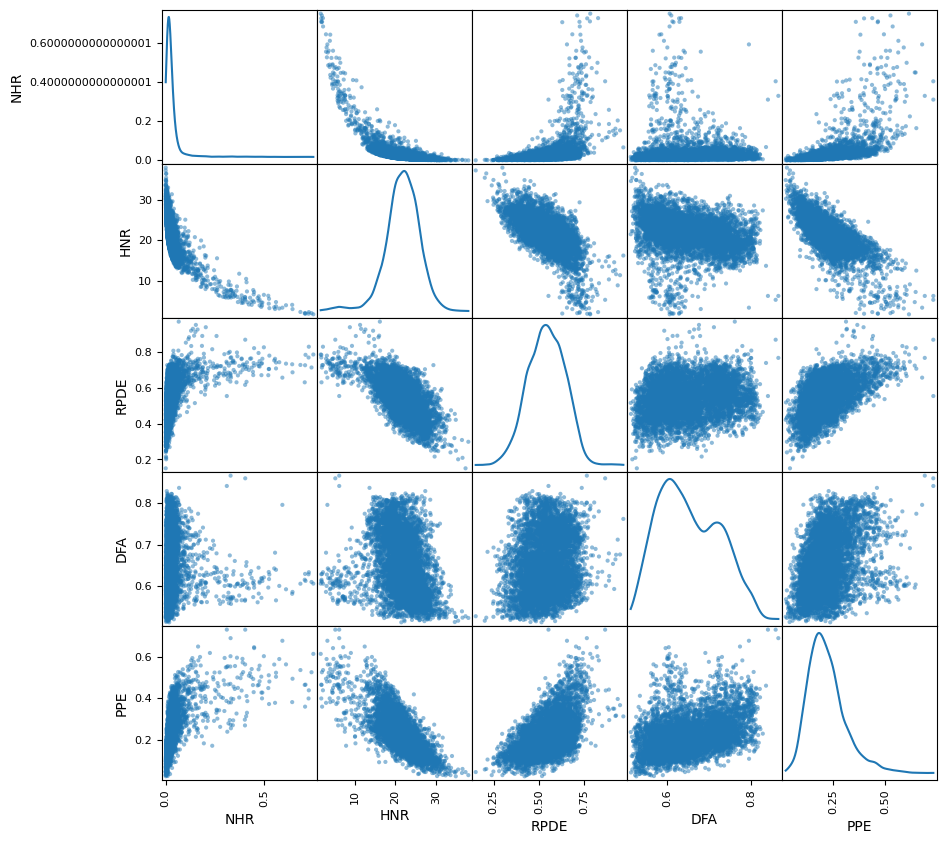

In [65]:
pd.plotting.scatter_matrix(df.iloc[:, 16:21], figsize=(10, 10), diagonal='kde')

Между признаками NHR и HNR наблюдается обратная зависимость. Между признакми NHR, PPE и PDRE можно установить нелинейную прямую зависимость.

Признак DFA коррелирует слабо с остальными признаками.

Итого, поскольку признаки типа Jitter сильно коррелируют между собой, в наборе данных можно оставить только один из них (для сокращения признакового пространства).

Аналогично можно оставить только один из признаков Shimmer.

Можно оставить только один признак из NHR, PPE, PDRE и HNR.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='test_time', ylabel='age'>,
        <Axes: xlabel='total_UPDRS', ylabel='age'>,
        <Axes: xlabel='Jitter(%)', ylabel='age'>,
        <Axes: xlabel='Shimmer', ylabel='age'>,
        <Axes: xlabel='HNR', ylabel='age'>,
        <Axes: xlabel='DFA', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='test_time'>,
        <Axes: xlabel='test_time', ylabel='test_time'>,
        <Axes: xlabel='total_UPDRS', ylabel='test_time'>,
        <Axes: xlabel='Jitter(%)', ylabel='test_time'>,
        <Axes: xlabel='Shimmer', ylabel='test_time'>,
        <Axes: xlabel='HNR', ylabel='test_time'>,
        <Axes: xlabel='DFA', ylabel='test_time'>],
       [<Axes: xlabel='age', ylabel='total_UPDRS'>,
        <Axes: xlabel='test_time', ylabel='total_UPDRS'>,
        <Axes: xlabel='total_UPDRS', ylabel='total_UPDRS'>,
        <Axes: xlabel='Jitter(%)', ylabel='total_UPDRS'>,
        <Axes: xlabel='Shimmer', ylabel='total_UPDRS'>,
        

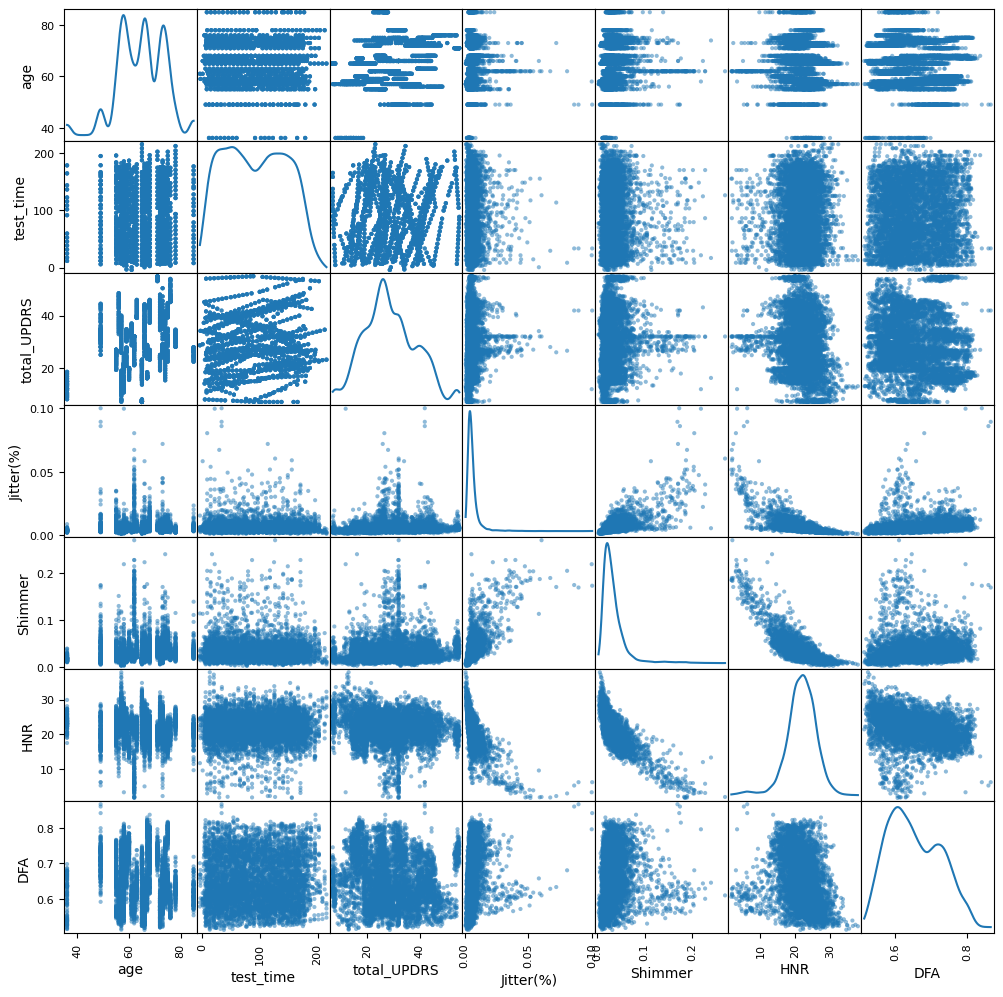

In [66]:
pd.plotting.scatter_matrix(df.iloc[:, [1, 3, 4, 5, 10, 17, 19]], figsize=(12, 12), diagonal='kde') #kde - график плотности распределения Kernel Density Estimation (KDE)

Из общей матрицы рассеивания видно, что Jitter, Shimmer, HNR коррелируют друг с другом.

Для целевого признака корреляция не наблюдается ни с одним из других признаков.

In [70]:
# Пункт 15: корреляционная матрица (включая total_UPDRS)
corr_matrix = df.iloc[:, 1:].corr()

# Новый синтаксис: вместо set_precision используем format
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=3)

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000,-0.042,0.020,0.310,0.023,0.013,0.010,0.013,0.010,0.102,0.111,0.099,0.090,0.135,0.099,0.007,-0.105,0.090,-0.093,0.121
sex,-0.042,1.000,-0.010,-0.097,0.051,-0.159,0.077,0.088,0.077,0.059,0.056,0.045,0.065,0.023,0.045,0.168,-0.000,-0.159,-0.165,-0.100
test_time,0.020,-0.010,1.000,0.075,-0.023,0.001,-0.029,-0.023,-0.029,-0.034,-0.031,-0.029,-0.037,-0.039,-0.029,-0.026,0.037,-0.039,0.019,-0.001
total_UPDRS,0.310,-0.097,0.075,1.000,0.074,0.054,0.064,0.063,0.064,0.092,0.099,0.079,0.083,0.121,0.079,0.061,-0.162,0.157,-0.113,0.156
Jitter(%),0.023,0.051,-0.023,0.074,1.000,0.860,0.984,0.968,0.984,0.710,0.717,0.664,0.694,0.646,0.664,0.825,-0.675,0.427,0.227,0.722
Jitter(Abs),0.013,-0.159,0.001,0.054,0.860,1.000,0.843,0.803,0.843,0.648,0.655,0.631,0.625,0.595,0.631,0.692,-0.707,0.542,0.351,0.788
Jitter:RAP,0.010,0.077,-0.029,0.064,0.984,0.843,1.000,0.947,1.000,0.682,0.686,0.650,0.660,0.603,0.650,0.792,-0.641,0.383,0.215,0.671
Jitter:PPQ5,0.013,0.088,-0.023,0.063,0.968,0.803,0.947,1.000,0.947,0.733,0.735,0.677,0.734,0.668,0.677,0.865,-0.662,0.382,0.175,0.663
Jitter:DDP,0.010,0.077,-0.029,0.064,0.984,0.843,1.000,0.947,1.000,0.682,0.686,0.650,0.660,0.603,0.650,0.792,-0.641,0.383,0.215,0.671
Shimmer,0.102,0.059,-0.034,0.092,0.710,0.648,0.682,0.733,0.682,1.000,0.992,0.980,0.985,0.935,0.980,0.795,-0.801,0.468,0.133,0.616


## Подготовка данных

### Работа с недостающими данными
В двух признаках наблюдаются пропущенные значения. Ранее было установлено, что эти признаки (Jitter(Abs) и Jitter:PPQ5) коррелируют с остальными показателями Jitter, т.к. они являются разными способами измерения одного и того же явления.

Поэтому данные признаки можно убрать из набора данных без потери его информативности.

In [78]:
df_initial = df.drop(["Jitter(Abs)", "Jitter:PPQ5"], axis=1)
df_prepared = df_initial
df_prepared

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter:RAP,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.643,34.398,0.007,4.010e-03,0.012,0.026,0.230,0.014,0.013,0.017,0.043,0.014,21.640,0.419,0.548,0.160
1,1,72,0,12.666,34.894,0.003,1.320e-03,0.004,0.020,0.179,0.010,0.011,0.017,0.030,0.011,27.183,0.435,0.565,0.108
2,1,72,0,19.681,35.389,0.005,2.050e-03,0.006,0.017,0.181,0.007,0.008,0.015,0.022,0.020,23.047,0.462,0.544,0.210
3,1,72,0,25.647,35.810,0.005,1.910e-03,0.006,0.023,0.327,0.011,0.013,0.020,0.033,0.028,24.445,0.487,0.578,0.333
4,1,72,0,33.642,36.375,0.003,9.300e-04,0.003,0.017,0.176,0.007,0.009,0.018,0.020,0.012,26.126,0.472,0.561,0.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.790,33.485,0.004,1.670e-03,0.005,0.019,0.160,0.010,0.011,0.015,0.029,0.025,22.369,0.642,0.553,0.214
5871,42,61,0,149.840,32.988,0.003,1.190e-03,0.004,0.023,0.215,0.011,0.013,0.019,0.032,0.012,22.886,0.526,0.565,0.126
5872,42,61,0,156.820,32.495,0.003,1.520e-03,0.005,0.025,0.244,0.014,0.015,0.019,0.041,0.018,25.065,0.478,0.579,0.142
5873,42,61,0,163.730,32.007,0.003,1.280e-03,0.004,0.015,0.131,0.007,0.009,0.013,0.021,0.008,24.422,0.569,0.563,0.142


### Анализ признаков

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression

data_X = df_prepared.iloc[:, list(range(0, 4)) + list(range(5, 19))]
data_Y = df_prepared["total_UPDRS"] # Выбираем столбец "motor_UPDRS" как целевую переменную, которую мы хотим предсказывать

best_features = SelectKBest(f_regression, k=5) # Создаем объект SelectKBest с функцией оценки f_regression, который выберет 5 лучших признаков по их статистической значимости для регрессионной задачи.
fit = best_features.fit(data_X, data_Y) # Оценка значимости каждого признака в data_X относительно data_Y. После этого объект best_features содержит информацию о F-значениях для всех признаков.
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(data_X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1) # Итоговая таблица, в которой каждому признаку соответствует его F-значение.
feature_scores

,0,0
0,subject#,403.817
1,age,625.693
2,sex,55.273
3,test_time,33.457
4,Jitter(%),32.555
5,Jitter:RAP,24.166
6,Jitter:DDP,24.176
7,Shimmer,50.288
8,Shimmer(dB),57.882
9,Shimmer:APQ3,37.225


На основании анализа лучших признаков, можно сделать следующие выводы:
- subject имеет высокий показатель важности, но он не подходит по смыслу, т.к. на основании номера пациента нельзя предсказать у него какой-либо медицинский показатель. Поэтому данный признак следует убрать
- age имеет высокий показатель важности и его следует оставить в наборе
- sex, test_time Jitter(%), Jitter:RAP и Jitter:DDP можно убрать ввиду их слабой информативности
- можно оставить Shimmer:APQ11, остальные Shimmer следует убрать, т.к. они коррелируют с этим "лучшим" признаком
- поскольку NHR, RPDE, PPE коррелируют, можно оставить лучший из них - PPE
- HNR и DFA можно оставить.

In [80]:
df_prepared = df_prepared.drop(["subject#", "sex", "test_time", "Jitter(%)", "Jitter:RAP", "Jitter:DDP", "Shimmer", "Shimmer(dB)", "Shimmer:DDA", "Shimmer:APQ3", "Shimmer:APQ5", "NHR", "RPDE"], axis=1)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5875 entries, 0 to 5874
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   total_UPDRS    5875 non-null   float64
 2   Shimmer:APQ11  5875 non-null   float64
 3   HNR            5875 non-null   float64
 4   DFA            5875 non-null   float64
 5   PPE            5875 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 321.3 KB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_UPDRS'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

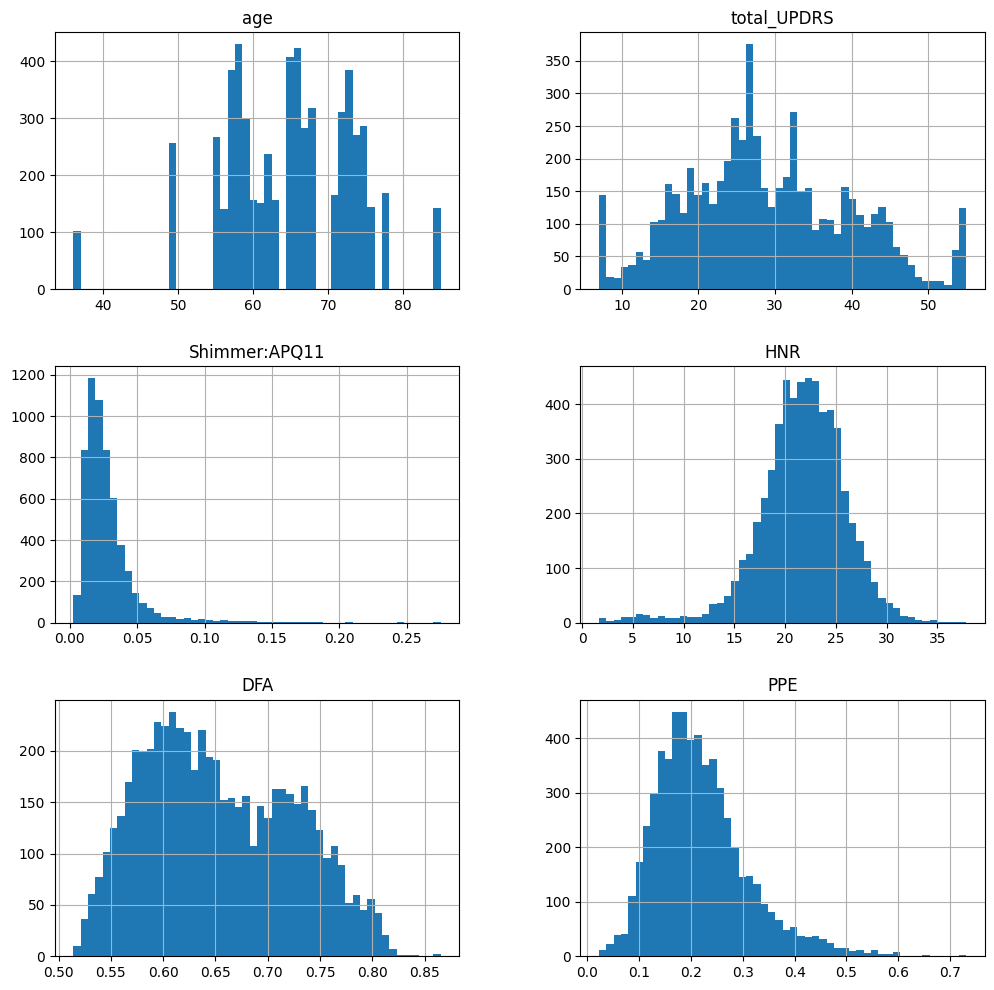

In [81]:
df_prepared.hist(bins=50, figsize=(12,12))

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='total_UPDRS', ylabel='age'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='age'>,
        <Axes: xlabel='HNR', ylabel='age'>,
        <Axes: xlabel='DFA', ylabel='age'>,
        <Axes: xlabel='PPE', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='total_UPDRS'>,
        <Axes: xlabel='total_UPDRS', ylabel='total_UPDRS'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='total_UPDRS'>,
        <Axes: xlabel='HNR', ylabel='total_UPDRS'>,
        <Axes: xlabel='DFA', ylabel='total_UPDRS'>,
        <Axes: xlabel='PPE', ylabel='total_UPDRS'>],
       [<Axes: xlabel='age', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='total_UPDRS', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='HNR', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='DFA', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='PPE', ylabel='Shimmer:APQ11'>],
       [<Axes: xlabel='age', ylabel='HNR'>,

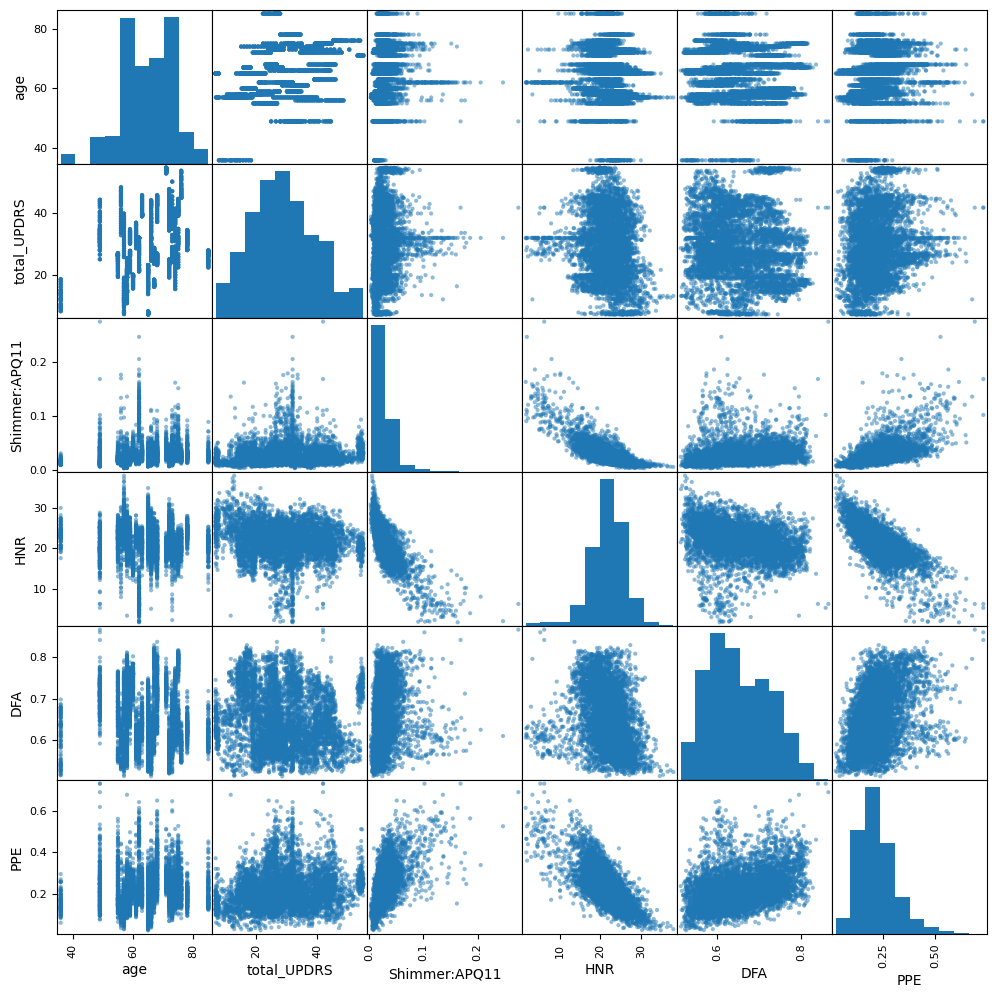

In [82]:
pd.plotting.scatter_matrix(df_prepared, figsize=(12, 12))

### Стандартизация

In [84]:
from sklearn.preprocessing import StandardScaler

# Предположим, у тебя уже есть DataFrame df_initial и df_prepared
# где df_prepared — это данные без целевого признака total_UPDRS

scaler = StandardScaler()

# Стандартизация данных
df_initial_transformed = pd.DataFrame(
    scaler.fit_transform(df_initial),
    columns=df_initial.columns
)

df_prepared_transformed = pd.DataFrame(
    scaler.fit_transform(df_prepared),
    columns=df_prepared.columns
)

# Посмотрим первые строки
print(df_initial_transformed.head())

   subject#    age    sex  test_time  total_UPDRS  Jitter(%)  Jitter:RAP  \
0    -1.657  0.816 -0.683     -1.632        0.503      0.083       0.327   
1    -1.657  0.816 -0.683     -1.501        0.549     -0.561      -0.534   
2    -1.657  0.816 -0.683     -1.369        0.595     -0.239      -0.300   
3    -1.657  0.816 -0.683     -1.258        0.635     -0.155      -0.345   
4    -1.657  0.816 -0.683     -1.108        0.688     -0.499      -0.659   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0       0.329   -0.325       -0.352        -0.210        -0.423   
1      -0.535   -0.534       -0.573        -0.545        -0.566   
2      -0.299   -0.669       -0.564        -0.742        -0.702   
3      -0.345   -0.424        0.070        -0.461        -0.450   
4      -0.660   -0.658       -0.586        -0.783        -0.651   

   Shimmer:APQ11  Shimmer:DDA    NHR    HNR   RPDE    DFA    PPE  
0         -0.543       -0.210 -0.299 -0.009 -1.214 -1.478 -0.651  
1     

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_UPDRS'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

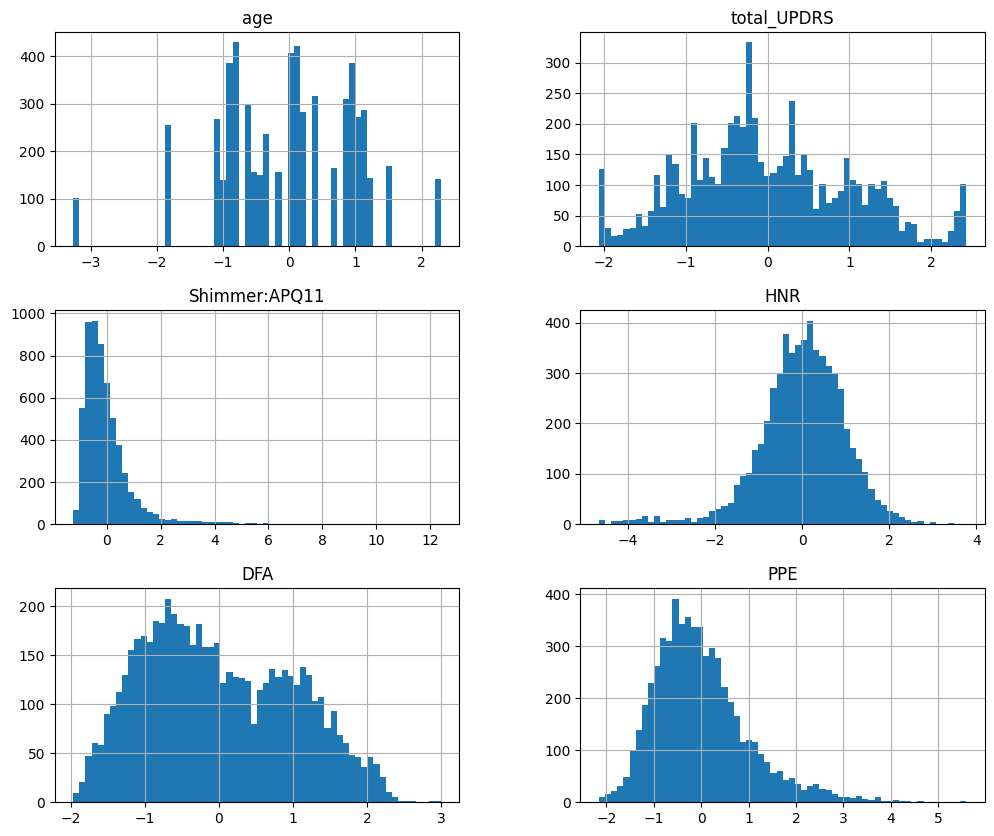

In [85]:
df_prepared_transformed.hist(bins=60, figsize=(12, 10))

Полученные данные ограничены диапазоном принимаемых значений [0, 1], сохраняя свое исходное распределение.

## Разделение данных на обучающие, валидационные и тестовые наборы

In [87]:
def get_x_y(df, target_name="total_UPDRS"):
    """
    Разделяет DataFrame на матрицу признаков X и целевой вектор Y.
    Удаляет указанный ненужный признак (motor_UPDRS).
    """
    X = df.drop(columns=[target_name])
    Y = df[target_name]
    return X, Y


# Разделяем исходные и масштабированные данные
initial_X, initial_Y = get_x_y(df_initial)  # исходные данные
initial_X_t, initial_Y_t = get_x_y(df_initial_transformed)  # стандартизированные исходные данные

prepared_X, prepared_Y = get_x_y(df_prepared)  # подготовленные данные
prepared_X_t, prepared_Y_t = get_x_y(df_prepared_transformed)  # стандартизированные подготовленные данные

Выделение тестовой выборки

In [91]:
from sklearn.model_selection import train_test_split

# Константы для разбиения
TEST_SIZE = 0.25   # 25% данных — тестовая выборка
SEED = 42          # для воспроизводимости
SHUFFLE = True     # перемешивание данных

def split(x, y, test_size=TEST_SIZE, seed=SEED, shuffle=SHUFFLE):
    """
    Разбивает данные на обучающую и тестовую выборки
    """
    return train_test_split(x, y, test_size=test_size, random_state=seed, shuffle=shuffle)

# Разбиваем данные на train/test для всех наборов
initial_X_train, initial_X_test, initial_Y_train, initial_Y_test = split(initial_X, initial_Y)
initial_X_t_train, initial_X_t_test, initial_Y_t_train, initial_Y_t_test = split(initial_X_t, initial_Y_t)

prepared_X_train, prepared_X_test, prepared_Y_train, prepared_Y_test = split(prepared_X, prepared_Y)
prepared_X_t_train, prepared_X_t_test, prepared_Y_t_train, prepared_Y_t_test = split(prepared_X_t, prepared_Y_t)

# Проверим результат
prepared_X_test

,age,Shimmer:APQ11,HNR,DFA,PPE
5366,66,0.027,23.543,0.645,0.144
4326,36,0.017,23.979,0.636,0.233
199,58,0.038,18.384,0.755,0.237
3260,60,0.048,14.349,0.784,0.348
4955,62,0.071,6.092,0.583,0.465
...,...,...,...,...,...
3737,74,0.026,18.368,0.704,0.254
4448,66,0.019,20.180,0.561,0.235
2997,57,0.015,29.752,0.661,0.082
757,63,0.032,23.062,0.619,0.145


Выделение валидационной выборки

In [92]:
# Размер валидационной выборки (25% от обучающих данных)
VAL_SIZE = 0.25

# 🔹 Разделяем обучающие данные (без масштабирования)
initial_X_train, initial_X_val, initial_Y_train, initial_Y_val = \
    split(initial_X_train, initial_Y_train, test_size=VAL_SIZE)

# 🔹 Разделяем обучающие данные (стандартизированные)
initial_X_t_train, initial_X_t_val, initial_Y_t_train, initial_Y_t_val = \
    split(initial_X_t_train, initial_Y_t_train, test_size=VAL_SIZE)

# 🔹 Разделяем подготовленные данные (без масштабирования)
prepared_X_train, prepared_X_val, prepared_Y_train, prepared_Y_val = \
    split(prepared_X_train, prepared_Y_train, test_size=VAL_SIZE)

# 🔹 Разделяем подготовленные данные (стандартизированные)
prepared_X_t_train, prepared_X_t_val, prepared_Y_t_train, prepared_Y_t_val = \
    split(prepared_X_t_train, prepared_Y_t_train, test_size=VAL_SIZE)

# Проверяем результат
prepared_X_t_train

,age,Shimmer:APQ11,HNR,DFA,PPE
4009,1.496,-0.002,0.815,-0.504,-0.007
5825,-0.431,-0.485,0.454,-0.877,-0.734
1053,0.929,-0.140,-0.149,0.262,0.060
3520,-1.792,-0.581,0.568,0.614,-0.355
5815,-0.431,-0.732,0.555,-0.792,-1.197
...,...,...,...,...,...
4227,1.156,0.732,-0.320,2.084,1.465
1859,-0.771,-0.638,0.693,0.141,-0.662
2667,-1.112,-0.181,0.155,0.519,0.785
928,0.816,0.078,0.263,-0.879,-0.597


In [94]:
prepared_Y_val # Выводим валидационную выборку целевой переменной стандартизированных подготовленных данных для проверки

,total_UPDRS
1208,24.681
2451,7.000
269,20.647
4826,53.340
5129,24.896
...,...
5758,33.452
1635,19.237
3840,33.503
3852,40.196


In [95]:
print(f'initial: train - {initial_X_train.shape}, validation - {initial_X_val.shape}, test - {initial_X_test.shape}')
print(f'prepared: train - {prepared_X_train.shape}, validation - {prepared_X_val.shape}, test - {prepared_X_test.shape}')

initial: train - (3304, 18), validation - (1102, 18), test - (1469, 18)
prepared: train - (3304, 5), validation - (1102, 5), test - (1469, 5)


## Построение полносвязной нейросетевой регрессионной модели

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

LEARNING_RATE = 0.01
BATCH_SIZE = 16
EPOCHS = 30
TIMESTEPS = 1  # Для "непоследовательных" данных можно оставить 1
FEATURES = prepared_X_t_train.shape[1]  # количество признаков

def get_bi_lstm_model(timesteps=TIMESTEPS, features=FEATURES):
    """
    Создает двунаправленную LSTM для регрессии
    """
    model = keras.Sequential()

    # Входной слой Bidirectional LSTM
    model.add(layers.Bidirectional(
        layers.LSTM(32, activation="tanh", return_sequences=False),
        input_shape=(timesteps, features)
    ))

    # Полносвязный слой для сжатия информации
    model.add(layers.Dense(16, activation="relu"))

    # Выходной слой (регрессия)
    model.add(layers.Dense(1, activation="linear"))

    return model

def compile_model(model):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
    )

def fit_model(model, x, y, x_val, y_val, batch_size=BATCH_SIZE, epochs=EPOCHS):
    history = model.fit(
        x, y,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
        verbose=1
    )

    print("Learning results:")
    for key in history.history.keys():
        print(f"\t{key}: {history.history[key][-1]:.4f}")

*Полносвязная модель на исходных данных:*

In [100]:
# Преобразуем в 3D для LSTM
X_train_3d = initial_X_train.values.reshape((initial_X_train.shape[0], 1, initial_X_train.shape[1]))
X_val_3d   = initial_X_val.values.reshape((initial_X_val.shape[0], 1, initial_X_val.shape[1]))

# Создаем и компилируем модель
model_lstm_initial = get_bi_lstm_model(timesteps=1, features=X_train_3d.shape[2])
compile_model(model_lstm_initial)

# Обучаем модель
fit_model(model_lstm_initial, X_train_3d, initial_Y_train, X_val_3d, initial_Y_val)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 257.1129 - mean_absolute_error: 12.4527 - root_mean_squared_error: 15.4936 - val_loss: 112.5118 - val_mean_absolute_error: 8.4631 - val_root_mean_squared_error: 10.6072
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106.1184 - mean_absolute_error: 8.2247 - root_mean_squared_error: 10.3006 - val_loss: 115.8854 - val_mean_absolute_error: 8.3063 - val_root_mean_squared_error: 10.7650
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105.7238 - mean_absolute_error: 8.1486 - root_mean_squared_error: 10.2795 - val_loss: 107.2994 - val_mean_absolute_error: 8.2711 - val_root_mean_squared_error: 10.3585
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 99.0108 - mean_absolute_error: 7.9879 - root_mean_squared_error: 9.9494 - val_loss: 100.9409 - val_mean_absolute_error: 7.7169 - val_root_mean_squared_error: 10.0469
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 96.8300 - mean_absolute_error: 7.7125 - 

*Полносвязная модель на преобразованных исходных данных:*

In [101]:
# Преобразуем в 3D
X_train_t_3d = initial_X_t_train.values.reshape((initial_X_t_train.shape[0], 1, initial_X_t_train.shape[1]))
X_val_t_3d   = initial_X_t_val.values.reshape((initial_X_t_val.shape[0], 1, initial_X_t_val.shape[1]))

# Создаем и компилируем модель
model_lstm_initial_t = get_bi_lstm_model(timesteps=1, features=X_train_t_3d.shape[2])
compile_model(model_lstm_initial_t)

# Обучаем модель
fit_model(model_lstm_initial_t, X_train_t_3d, initial_Y_t_train, X_val_t_3d, initial_Y_t_val)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7258 - mean_absolute_error: 0.6904 - root_mean_squared_error: 0.8493 - val_loss: 0.3703 - val_mean_absolute_error: 0.4623 - val_root_mean_squared_error: 0.6085
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2892 - mean_absolute_error: 0.4110 - root_mean_squared_error: 0.5374 - val_loss: 0.2275 - val_mean_absolute_error: 0.3498 - val_root_mean_squared_error: 0.4769
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1961 - mean_absolute_error: 0.3346 - root_mean_squared_error: 0.4427 - val_loss: 0.1772 - val_mean_absolute_error: 0.3058 - val_root_mean_squared_error: 0.4209
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1483 - mean_absolute_error: 0.2847 - root_mean_squared_error: 0.3850 - val_loss: 0.1588 - val_mean_absolute_error: 0.2944 - val_root_mean_squared_error: 0.3985
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1124 - mean_absolute_error: 0.2487 - root_mean_squared_error:

*Полносвязная модель на подготовленных данных:*

In [102]:
# Преобразуем в 3D
X_prepared_3d = prepared_X_train.values.reshape((prepared_X_train.shape[0], 1, prepared_X_train.shape[1]))
X_prepared_val_3d = prepared_X_val.values.reshape((prepared_X_val.shape[0], 1, prepared_X_val.shape[1]))

# Создаем и компилируем модель
model_lstm_prepared = get_bi_lstm_model(timesteps=1, features=X_prepared_3d.shape[2])
compile_model(model_lstm_prepared)

# Обучаем модель
fit_model(model_lstm_prepared, X_prepared_3d, prepared_Y_train, X_prepared_val_3d, prepared_Y_val)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 321.8505 - mean_absolute_error: 13.9800 - root_mean_squared_error: 17.2772 - val_loss: 106.7368 - val_mean_absolute_error: 8.4496 - val_root_mean_squared_error: 10.3314
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 106.4413 - mean_absolute_error: 8.4623 - root_mean_squared_error: 10.3152 - val_loss: 107.0496 - val_mean_absolute_error: 8.5168 - val_root_mean_squared_error: 10.3465
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 106.0675 - mean_absolute_error: 8.4494 - root_mean_squared_error: 10.2972 - val_loss: 106.9514 - val_mean_absolute_error: 8.4862 - val_root_mean_squared_error: 10.3417
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 106.4074 - mean_absolute_error: 8.4675 - root_mean_squared_error: 10.3136 - val_loss: 106.7688 - val_mean_absolute_error: 8.5341 - val_root_mean_squared_error: 10.3329
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106.1802 - mean_absolute_error: 8.4763

*Полносвязная модель на подготовленных масштабированных данных:*

In [103]:
## Преобразуем в 3D
X_prepared_t_3d = prepared_X_t_train.values.reshape((prepared_X_t_train.shape[0], 1, prepared_X_t_train.shape[1]))
X_prepared_t_val_3d = prepared_X_t_val.values.reshape((prepared_X_t_val.shape[0], 1, prepared_X_t_val.shape[1]))

# Создаем и компилируем модель
model_lstm_prepared_t = get_bi_lstm_model(timesteps=1, features=X_prepared_t_3d.shape[2])
compile_model(model_lstm_prepared_t)

# Обучаем модель
fit_model(model_lstm_prepared_t, X_prepared_t_3d, prepared_Y_t_train, X_prepared_t_val_3d, prepared_Y_t_val)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8580 - mean_absolute_error: 0.7685 - root_mean_squared_error: 0.9260 - val_loss: 0.7564 - val_mean_absolute_error: 0.7094 - val_root_mean_squared_error: 0.8697
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7307 - mean_absolute_error: 0.7046 - root_mean_squared_error: 0.8547 - val_loss: 0.6756 - val_mean_absolute_error: 0.6596 - val_root_mean_squared_error: 0.8220
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6442 - mean_absolute_error: 0.6531 - root_mean_squared_error: 0.8025 - val_loss: 0.6354 - val_mean_absolute_error: 0.6434 - val_root_mean_squared_error: 0.7971
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5982 - mean_absolute_error: 0.6232 - root_mean_squared_error: 0.7734 - val_loss: 0.5941 - val_mean_absolute_error: 0.6193 - val_root_mean_squared_error: 0.7708
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5618 - mean_absolute_error: 0.5956 - root_mean_squared_error:

Итого, лучшей полносвязной моделью оказалась модель, обученная исходных, но преобразованных данных.

Показатели коэффициента детерминации $R^2$ на валидационной выборке ближе всех к 1, RMSE и значение функции потерь на порядок меньше аналогичных показателей других моделей.

# Двунаправленная LSTM рекуррентная сеть

Для использования рекуррентных сетей следует развернуть двумерные данные в трехмерные:

In [104]:
import numpy as np

def reshape_to_3d(df):
    """
    Преобразует DataFrame в 3D тензор для LSTM: (samples, timesteps, features)
    """
    tensor = np.array(df)
    return tensor.reshape(tensor.shape[0], 1, tensor.shape[1])  # 1 timestep

# 🔹 Преобразование всех наборов данных
rnn_initial_X      = reshape_to_3d(initial_X)       # исходные данные
rnn_initial_X_t    = reshape_to_3d(initial_X_t)     # масштабированные исходные данные
rnn_prepared_X     = reshape_to_3d(prepared_X)      # подготовленные данные
rnn_prepared_X_t   = reshape_to_3d(prepared_X_t)    # подготовленные и масштабированные данные

# Проверим размеры
print(f"initial: {rnn_initial_X.shape}")
print(f"initial transformed: {rnn_initial_X_t.shape}")
print(f"prepared: {rnn_prepared_X.shape}")
print(f"prepared transformed: {rnn_prepared_X_t.shape}")

initial: (5875, 1, 18)
initial transformed: (5875, 1, 18)
prepared: (5875, 1, 5)
prepared transformed: (5875, 1, 5)


Разделим данные на тестовую, валидационную и тренировочную выборки

In [105]:
# 🔹 Разделение 3D данных на обучающие и тестовые
rnn_initial_X_train, rnn_initial_X_test, rnn_initial_Y_train, rnn_initial_Y_test = split(rnn_initial_X, initial_Y)
rnn_initial_X_t_train, rnn_initial_X_t_test, rnn_initial_Y_t_train, rnn_initial_Y_t_test = split(rnn_initial_X_t, initial_Y_t)
rnn_prepared_X_train, rnn_prepared_X_test, rnn_prepared_Y_train, rnn_prepared_Y_t_test = split(rnn_prepared_X, prepared_Y)
rnn_prepared_X_t_train, rnn_prepared_X_t_test, rnn_prepared_Y_t_train, rnn_prepared_Y_t_test = split(rnn_prepared_X_t, prepared_Y_t)

# 🔹 Дополнительное разбиение обучающих данных на тренировочные и валидационные
rnn_initial_X_train, rnn_initial_X_val, rnn_initial_Y_train, rnn_initial_Y_val = \
    split(rnn_initial_X_train, rnn_initial_Y_train, test_size=VAL_SIZE)

rnn_initial_X_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_train, rnn_initial_Y_t_val = \
    split(rnn_initial_X_t_train, rnn_initial_Y_t_train, test_size=VAL_SIZE)

rnn_prepared_X_train, rnn_prepared_X_val, rnn_prepared_Y_train, rnn_prepared_Y_val = \
    split(rnn_prepared_X_train, rnn_prepared_Y_train, test_size=VAL_SIZE)

rnn_prepared_X_t_train, rnn_prepared_X_t_val, rnn_prepared_Y_t_train, rnn_prepared_Y_t_val = \
    split(rnn_prepared_X_t_train, rnn_prepared_Y_t_train, test_size=VAL_SIZE)

### Сформируем двунаправленную рекуррентную нейронную сеть

In [106]:
def get_rnn_model(timesteps=1, features=None):
    """
    Создает двунаправленную LSTM модель для регрессии.

    Параметры:
    - timesteps: количество временных шагов (обычно 1 для не последовательных данных)
    - features: количество входных признаков
    """
    model = keras.Sequential()

    # Входной двунаправленный LSTM слой
    model.add(layers.Bidirectional(
        layers.LSTM(32, activation="tanh", return_sequences=False),
        input_shape=(timesteps, features)
    ))

    # Полносвязный слой для сжатия информации
    model.add(layers.Dense(16, activation="relu"))

    # Выходной слой для регрессии
    model.add(layers.Dense(1, activation="linear", name="output"))

    return model

Обучние на исходных данных

In [107]:
# Модель RNN на исходных данных
model_rnn_initial = get_rnn_model(
    timesteps=1,
    features=rnn_initial_X_train.shape[2]
)
compile_model(model_rnn_initial)
fit_model(
    model_rnn_initial,
    rnn_initial_X_train,
    rnn_initial_Y_train,
    rnn_initial_X_val,
    rnn_initial_Y_val
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 316.5547 - mean_absolute_error: 13.8799 - root_mean_squared_error: 17.1668 - val_loss: 116.9506 - val_mean_absolute_error: 8.6798 - val_root_mean_squared_error: 10.8144
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110.8485 - mean_absolute_error: 8.4922 - root_mean_squared_error: 10.5266 - val_loss: 107.8045 - val_mean_absolute_error: 7.9641 - val_root_mean_squared_error: 10.3829
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99.9478 - mean_absolute_error: 7.9459 - root_mean_squared_error: 9.9966 - val_loss: 97.6280 - val_mean_absolute_error: 7.6206 - val_root_mean_squared_error: 9.8807
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 95.9930 - mean_absolute_error: 7.7527 - root_mean_squared_error: 9.7968 - val_loss: 104.2598 - val_mean_absolute_error: 8.0180 - val_root_mean_squared_error: 10.2108
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100.6997 - mean_absolute_error: 7.9731 - roo

Обучение на преобразованных исходных данных

In [108]:
# Модель RNN на масштабированных исходных данных
model_rnn_initial_t = get_rnn_model(
    timesteps=1,
    features=rnn_initial_X_t_train.shape[2]
)
compile_model(model_rnn_initial_t)
fit_model(
    model_rnn_initial_t,
    rnn_initial_X_t_train,
    rnn_initial_Y_t_train,
    rnn_initial_X_t_val,
    rnn_initial_Y_t_val
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7196 - mean_absolute_error: 0.6843 - root_mean_squared_error: 0.8456 - val_loss: 0.3424 - val_mean_absolute_error: 0.4453 - val_root_mean_squared_error: 0.5851
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2953 - mean_absolute_error: 0.4163 - root_mean_squared_error: 0.5432 - val_loss: 0.2338 - val_mean_absolute_error: 0.3549 - val_root_mean_squared_error: 0.4835
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2027 - mean_absolute_error: 0.3418 - root_mean_squared_error: 0.4501 - val_loss: 0.1978 - val_mean_absolute_error: 0.3216 - val_root_mean_squared_error: 0.4448
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1493 - mean_absolute_error: 0.2920 - root_mean_squared_error: 0.3864 - val_loss: 0.1520 - val_mean_absolute_error: 0.2850 - val_root_mean_squared_error: 0.3898
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1223 - mean_absolute_error: 0.2637 - root_mean_squared_error:

Выполним обучение на подготовленных данных

In [109]:
# Модель RNN на подготовленных данных
model_rnn_prepared = get_rnn_model(
    timesteps=1,
    features=rnn_prepared_X_train.shape[2]
)
compile_model(model_rnn_prepared)
fit_model(
    model_rnn_prepared,
    rnn_prepared_X_train,
    rnn_prepared_Y_train,
    rnn_prepared_X_val,
    rnn_prepared_Y_val
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 257.4730 - mean_absolute_error: 12.5125 - root_mean_squared_error: 15.4912 - val_loss: 106.9468 - val_mean_absolute_error: 8.5146 - val_root_mean_squared_error: 10.3415
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 107.0933 - mean_absolute_error: 8.5044 - root_mean_squared_error: 10.3468 - val_loss: 106.4226 - val_mean_absolute_error: 8.4409 - val_root_mean_squared_error: 10.3161
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106.0062 - mean_absolute_error: 8.4386 - root_mean_squared_error: 10.2941 - val_loss: 105.7893 - val_mean_absolute_error: 8.4136 - val_root_mean_squared_error: 10.2854
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106.1912 - mean_absolute_error: 8.4601 - root_mean_squared_error: 10.3031 - val_loss: 106.8784 - val_mean_absolute_error: 8.4529 - val_root_mean_squared_error: 10.3382
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105.5825 - mean_absolute_error: 8.4413

Выполним обучение на подготовленных преобразованных данных

In [110]:
# Модель RNN на подготовленных и масштабированных данных
model_rnn_prepared_t = get_rnn_model(
    timesteps=1,
    features=rnn_prepared_X_t_train.shape[2]
)
compile_model(model_rnn_prepared_t)
fit_model(
    model_rnn_prepared_t,
    rnn_prepared_X_t_train,
    rnn_prepared_Y_t_train,
    rnn_prepared_X_t_val,
    rnn_prepared_Y_t_val
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8699 - mean_absolute_error: 0.7699 - root_mean_squared_error: 0.9323 - val_loss: 0.7516 - val_mean_absolute_error: 0.6960 - val_root_mean_squared_error: 0.8670
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7042 - mean_absolute_error: 0.6886 - root_mean_squared_error: 0.8390 - val_loss: 0.6518 - val_mean_absolute_error: 0.6355 - val_root_mean_squared_error: 0.8073
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6251 - mean_absolute_error: 0.6387 - root_mean_squared_error: 0.7905 - val_loss: 0.5673 - val_mean_absolute_error: 0.5974 - val_root_mean_squared_error: 0.7532
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5561 - mean_absolute_error: 0.5955 - root_mean_squared_error: 0.7456 - val_loss: 0.5394 - val_mean_absolute_error: 0.5776 - val_root_mean_squared_error: 0.7344
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5167 - mean_absolute_error: 0.5701 - root_mean_squared_error:

Значения метрик для рекуррентных моделей, оказались немного хуже, чем у аналогичных им полносвязных моделей.

$R^2$ немного снизился, ошибка возросла как для валидационной, так и для тренировочной подвыборок.

### Таким образом, лучшей моделью стала модель полносвязной нейронной сети, обученная на исходных преобразованных данных
Оценка модели на тестовых данных

In [111]:
result = model_rnn_prepared_t.evaluate(
    rnn_prepared_X_t_test,
    rnn_prepared_Y_t_test,
    batch_size=BATCH_SIZE,
    verbose=1
)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2874 - mean_absolute_error: 0.4084 - root_mean_squared_error: 0.5359


### GridSearch для лучшей модели

In [112]:
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Функция создания Bidirectional LSTM модели с настройками
def build_rnn_model(num_lstm_units=32, dense_units=16, dense_activation='relu', timesteps=1, features=None):
    model = keras.Sequential()
    # Bidirectional LSTM слой
    model.add(layers.Bidirectional(
        layers.LSTM(num_lstm_units, activation='tanh', return_sequences=False),
        input_shape=(timesteps, features)
    ))
    # Dense слой
    model.add(layers.Dense(dense_units, activation=dense_activation))
    # Выходной слой
    model.add(layers.Dense(1, activation='linear'))

    # Компиляция модели
    model.compile(optimizer='adam', loss='mse')
    return model

# 🔹 Параметры для перебора
param_grid = {
    'num_lstm_units': [16, 32],
    'dense_units': [16, 32],
    'dense_activation': ['relu', 'sigmoid'],
    'batch_size': [16, 32],
    'epochs': [20]
}

# 🔹 Grid search
best_score = -np.inf
best_params = None
best_model = None

for num_lstm_units, dense_units, dense_activation, batch_size, epochs in product(*param_grid.values()):
    model = build_rnn_model(
        num_lstm_units=num_lstm_units,
        dense_units=dense_units,
        dense_activation=dense_activation,
        timesteps=1,
        features=rnn_initial_X_t_train.shape[2]  # количество признаков
    )

    # Обучение модели
    model.fit(
        rnn_initial_X_t_train,
        rnn_initial_Y_t_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_data=(rnn_initial_X_t_val, rnn_initial_Y_t_val)
    )

    # Предсказание и оценка
    y_val_pred = model.predict(rnn_initial_X_t_val)
    mse = mean_squared_error(rnn_initial_Y_t_val, y_val_pred)
    r2 = r2_score(rnn_initial_Y_t_val, y_val_pred)

    print(f"Testing: LSTM units={num_lstm_units}, Dense units={dense_units}, activation={dense_activation}, batch_size={batch_size}")
    print(f"\tR2 = {r2:.4f}, RMSE = {np.sqrt(mse):.4f}\n")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=16, activation=relu, batch_size=16
	R2 = 0.8531, RMSE = 0.3937



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=16, activation=relu, batch_size=32
	R2 = 0.8203, RMSE = 0.4354



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=16, activation=sigmoid, batch_size=16
	R2 = 0.8095, RMSE = 0.4483



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=16, activation=sigmoid, batch_size=32
	R2 = 0.7753, RMSE = 0.4869



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=32, activation=relu, batch_size=16
	R2 = 0.8617, RMSE = 0.3819



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=32, activation=relu, batch_size=32
	R2 = 0.8518, RMSE = 0.3954



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=32, activation=sigmoid, batch_size=16
	R2 = 0.7863, RMSE = 0.4748



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=16, Dense units=32, activation=sigmoid, batch_size=32
	R2 = 0.7501, RMSE = 0.5134



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Testing: LSTM units=32, Dense units=16, activation=relu, batch_size=16
	R2 = 0.8853, RMSE = 0.3479



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Testing: LSTM units=32, Dense units=16, activation=relu, batch_size=32
	R2 = 0.8471, RMSE = 0.4016



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=32, Dense units=16, activation=sigmoid, batch_size=16
	R2 = 0.8042, RMSE = 0.4545



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=32, Dense units=16, activation=sigmoid, batch_size=32
	R2 = 0.7726, RMSE = 0.4898



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Testing: LSTM units=32, Dense units=32, activation=relu, batch_size=16
	R2 = 0.8849, RMSE = 0.3484



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=32, Dense units=32, activation=relu, batch_size=32
	R2 = 0.8560, RMSE = 0.3897



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=32, Dense units=32, activation=sigmoid, batch_size=16
	R2 = 0.7966, RMSE = 0.4632



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Testing: LSTM units=32, Dense units=32, activation=sigmoid, batch_size=32
	R2 = 0.7597, RMSE = 0.5035



Лучшей моделью в результате GridSearch оказалась модель с параметрами:
- три слоя по 64 нейрона, один слой с одним нейроном (выходной)
- функция активации - ReLU
- размер батча - 16

In [113]:
EPOCHS = 40  # финальное количество эпох для обучения лучшей модели

# 🔹 Создаем лучшую модель RNN (Bidirectional LSTM) с выбранными гиперпараметрами
best_rnn_model = get_rnn_model(
    timesteps=1,
    features=rnn_initial_X_t_train.shape[2]  # количество признаков
)

# Если нужно, можно изменить LSTM/Dense параметры вручную:
# best_rnn_model = build_rnn_model(num_lstm_units=32, dense_units=16, dense_activation='relu', timesteps=1, features=rnn_initial_X_t_train.shape[2])

# 🔹 Компилируем модель
compile_model(best_rnn_model)

# 🔹 Обучаем модель на тренировочных данных с валидацией
fit_model(
    best_rnn_model,
    rnn_initial_X_t_train,
    rnn_initial_Y_t_train,
    rnn_initial_X_t_val,
    rnn_initial_Y_t_val,
    epochs=EPOCHS,
    batch_size=16
)

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7195 - mean_absolute_error: 0.6856 - root_mean_squared_error: 0.8453 - val_loss: 0.3319 - val_mean_absolute_error: 0.4342 - val_root_mean_squared_error: 0.5761
Epoch 2/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2792 - mean_absolute_error: 0.4046 - root_mean_squared_error: 0.5283 - val_loss: 0.2289 - val_mean_absolute_error: 0.3484 - val_root_mean_squared_error: 0.4784
Epoch 3/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1927 - mean_absolute_error: 0.3298 - root_mean_squared_error: 0.4389 - val_loss: 0.1891 - val_mean_absolute_error: 0.3199 - val_root_mean_squared_error: 0.4349
Epoch 4/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1527 - mean_absolute_error: 0.2967 - root_mean_squared_error: 0.3907 - val_loss: 0.1669 - val_mean_absolute_error: 0.2955 - val_root_mean_squared_error: 0.4085
Epoch 5/40
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1309 - mean_absolute_error: 0.2696 - root_mean_squared_error:

In [114]:
# 🔹 Оценка финальной лучшей модели на тестовых данных
best_rnn_model.evaluate(
    rnn_initial_X_t_test,
    rnn_initial_Y_t_test,
    batch_size=16,
    verbose=1
)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397 - mean_absolute_error: 0.1356 - root_mean_squared_error: 0.1985


[0.04505440965294838, 0.21226024627685547, 0.1420985460281372]

### Показатели метрик немного улучшились на тестовых данных

Таким образом, лучшей моделью стала полносвязная модель, обученная на исходных масштабированных данных.

Результат был немного улучшен с помощью GridSearch, лучшая архитектура сети - 3 слоя по 64 нейрона, выходной слой с одним нейроном, функции активации - ReLU.

Лучший результат метрики $R^2$ составил 0,85 для тестовых данных, что является неплохим результатом.

Лучшее значения для RMSE - 0,08 для тестовых данных.